In [1]:
# Plotting and analysis
# behavior figures

# this version was built with pandas version 2.2.2 and numpy version 1.26.4
# looking at bulk tuning curves in one plot for ACx and IC

#%% file import pre procesing
import pandas as pd
import numpy as np


import math 

#plots
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import savgol_filter

from array import *
from scipy.signal import find_peaks

print(np.__version__)

from scipy.ndimage import median_filter

import auto_tuning_functions_current as auto_tune

1.26.4


In [2]:
# frequency and intensity list for later
# these are the frequency and intensity parameters used for your recordings
freq_ls = [0]



db_ls = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

mgb_spks = pd.read_pickle('mgb_spks_rlf_full_final') # read in the data (can made using my unit extractor program link in README)
#ic_spks = pd.read_pickle('ic_spks_rlf(1)') # read in the data (can made using my unit extractor program link in README)
#ac_spks.to_csv('ac_spsks_test')
#ac_spks = ac_spks.loc[ac_spks['file'] != '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1']
# evoked_df create a dataframe of all relevant firing properties
# sanity argument set to 'yes' plots a sanity plot for every unit so you can inspect output visually
evoked_df = auto_tune.make_evoked_df(mgb_spks,freq_ls,db_ls,sanity='no')

# make_db_df takes the evoked df across intensities and produces the average of each relevant firing property
# outputs a neat dataframe for plotting across intensity
db_df = auto_tune.make_dB_df(evoked_df=evoked_df)
mgb_db = db_df # add intensity column
intensity_values = [i for i in range(0, 91, 5)]  # List of intensity values from 0 to 90 in steps of 5


repeated_intensity_values = (intensity_values * ((len(mgb_db) // len(intensity_values)) + 1))[:len(mgb_db)]

# Add the intensity column to the DataFrame
mgb_db['intensity'] = repeated_intensity_values
# Apply the function to each row and create a new column 'intensity'


# Define the file substrings and channel lists
file_substrings = ['BA190305B', 'BA190305C','BA190305E','BA190305F','BA190313B','BA190313C','BA190313F',
                   'BA190313G','BA190326B','BA190326C','BA190326F','BA190326G','BA190306B','BA190306C',
                   'BA190306F','BA190306G','BA190312B','BA190312C','BA190312F','BA190312G','BA190328B',
                   'BA190328C','BA190328F','BA190328G']
channel_lists = [
    [29,20,28,21,31,18,32,17,30,19,27],
    [20,28,21,31,18,32,17,30],
    [29,20,28,21,31,18,32,17,30,19,2],
    [29,20,28,21,31,18,32,17,30,19,27,2],
    [29,20,28,21,31,18,32,17,30,19,27],
    [29,20,28,21,31,18,32,17,30,19,27,22],
    [26,23,29,20,28,21,31,18,32,17,30,19,27,2],
    [24,26,23,29,20,28,21,31,18,32,17,30,19,27,22],
    [23,29,20,28,21,31,18,32,17,30,19],
    [26,23,29,20,28,21,31,18,32,17,30,19],
    [23,29,20,28,21,31,18,32,17,30,19,27,22],
    [23,29,20,28,21,31,18,32,17,30,19,27,22],
    [20,28,21,31,18,32,17,30,19,27,22],
    [29,20,28,21,31,18,32,17,30,19,27],
    [23,29,20,28,21,31,18,32,17,30,19,27],
    [26,23,29,20,28,21,31,18,32,17,30,19],
    [23,29,20,28,21,31,18,32,17,30,19,27],
    [26,23,29,20,28,21,31,18,32,17,30,19,27],
    [26,23,29,20,28,21,31,18,32,17,30,19,27],
    [26,23,29,20,28,21,31,18,32,17,30,19],
    [24,26,23,29,20,28,21,31,18,32,17,30,19,27],
    [24,26,23,29,20,28,21,31,18,32,17],
    [23,29,20,28,21,31,18,32,17],
    [23,29,20,28,21,31,18,32,17]
]

# Create a boolean mask for file substrings
file_mask = mgb_db['file'].str.contains('|'.join(file_substrings))

# Create a boolean mask for channel lists
channel_mask = mgb_db['channel'].apply(
    lambda x: any(x in channel_list for channel_list in channel_lists)
)

# Combine the masks
mgb_db = mgb_db[file_mask & channel_mask]



mgb_db = mgb_db.dropna() # drop weird empty rows
mgb_db.file.unique()


/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Blo

KeyError: '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] not in index'

ValueError: operands could not be broadcast together with shapes (10,) (4,) 

In [3]:
# frequency and intensity list for later
# these are the frequency and intensity parameters used for your recordings
freq_ls = [0]



db_ls = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

#ic_spks = pd.read_pickle('ic_spks_rlf(1)') # read in the data (can made using my unit extractor program link in README)
ic_spks = pd.read_pickle('ic_spks_rlf_redo') # read in the data (can made using my unit extractor program link in README)
#ac_spks.to_csv('ac_spsks_test')
ic_spks = ic_spks.loc[ic_spks['file'] != '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA160524B/Block-1']
# evoked_df create a dataframe of all relevant firing properties
# sanity argument set to 'yes' plots a sanity plot for every unit so you can inspect output visually
evoked_df = auto_tune.make_evoked_df(ic_spks,freq_ls,db_ls,sanity='no')

# make_db_df takes the evoked df across intensities and produces the average of each relevant firing property
# outputs a neat dataframe for plotting across intensity
db_df = auto_tune.make_dB_df(evoked_df=evoked_df)
ic_db = db_df # add intensity column
intensity_values = [i for i in range(0, 91, 5)]  # List of intensity values from 0 to 90 in steps of 5


repeated_intensity_values = (intensity_values * ((len(ic_db) // len(intensity_values)) + 1))[:len(ic_db)]

# Add the intensity column to the DataFrame
ic_db['intensity'] = repeated_intensity_values
# Apply the function to each row and create a new column 'intensity'

ic_db = ic_db.dropna() # drop weird empty rows
ic_db.file.unique()


/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Blo

/home/auerbach1/Downloads/auto_tuning_functions_current.py:351: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = plot_df._append({'latency': lat_mean, 'abs_peak_fr': peak_mean,


array(['/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305G/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305H/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306A/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306H/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306I/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312A/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312H/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312I/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190313A/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190313H/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190313I/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190326A/Block-1',

In [6]:
# frequency and intensity list for later
# these are the frequency and intensity parameters used for your recordings
freq_ls = [0]



db_ls = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

ac_spks = pd.read_pickle('acx_spks_rlf') # read in the data (can made using my unit extractor program link in README)
#ac_spks.to_csv('ac_spsks_test')
#ac_spks = ac_spks.loc[ac_spks['file'] != '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1']
# evoked_df create a dataframe of all relevant firing properties
# sanity argument set to 'yes' plots a sanity plot for every unit so you can inspect output visually
evoked_df = auto_tune.make_evoked_df(ac_spks,freq_ls,db_ls,sanity='no')

# make_db_df takes the evoked df across intensities and produces the average of each relevant firing property
# outputs a neat dataframe for plotting across intensity
db_df = auto_tune.make_dB_df(evoked_df=evoked_df)
ac_db = db_df # add intensity column
intensity_values = [i for i in range(0, 91, 5)]  # List of intensity values from 0 to 90 in steps of 5


repeated_intensity_values = (intensity_values * ((len(ac_db) // len(intensity_values)) + 1))[:len(ac_db)]

# Add the intensity column to the DataFrame
ac_db['intensity'] = repeated_intensity_values
# Apply the function to each row and create a new column 'intensity'

ac_db = ac_db.dropna() # drop weird empty rows
ac_db.file.unique()


/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Blo

/home/auerbach1/Downloads/auto_tuning_functions_current.py:351: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = plot_df._append({'latency': lat_mean, 'abs_peak_fr': peak_mean,


array(['/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305C/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305D/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305E/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305E/Block-4',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305F/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305G/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305H/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305I/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305J/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306B/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306C/Block-1',

NameError: name 'ac_spks' is not defined

In [5]:
ic_db = ic_db.loc[ic_db['first_bin'] >= 0]
ic_db = ic_db.loc[ic_db['latency'] >= 0]
ac_db = ac_db.loc[ac_db['first_bin'] >= 0]
ac_db = ac_db.loc[ac_db['latency'] >= 0]
mgb_db = mgb_db.loc[mgb_db['first_bin'] >= 0]
mgb_db = mgb_db.loc[mgb_db['latency'] >= 0]

In [4]:
unique_files_count = ic_db['file'].nunique()
total_channels_count = ic_db['channel'].count()
print(f"Number of unique files: {unique_files_count}")



unique_channels_per_file = ic_db.groupby('file')['channel'].nunique()

total_unique_channels_count = unique_channels_per_file.sum()

print(f"Unique channels per file:\n{unique_channels_per_file}")
print(f"Total number of unique channels across all files: {total_unique_channels_count}")



Number of unique files: 31
Unique channels per file:
file
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA160519A/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA160519B/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA160603A/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA160603B/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306A/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306H/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306I/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312A/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312H/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312I/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190328A/Block-1    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190328G/Block-4    17
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190328H/Block-1

In [24]:
unique_files_count = mgb_db['file'].nunique()
total_channels_count = mgb_db['channel'].count()
print(f"Number of unique files: {unique_files_count}")



unique_channels_per_file = mgb_db.groupby('file')['channel'].nunique()

total_unique_channels_count = unique_channels_per_file.sum()

print(f"Unique channels per file:\n{unique_channels_per_file}")
print(f"Total number of unique channels across all files: {total_unique_channels_count}")



Number of unique files: 23
Unique channels per file:
file
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306B/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306C/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306F/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306G/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312B/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312C/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312F/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312G/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190328B/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190328C/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190328F/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1    15
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305C/Block-1

In [25]:
unique_files_count = ac_db['file'].nunique()
total_channels_count = ac_db['channel'].count()
print(f"Number of unique files: {unique_files_count}")



unique_channels_per_file = ac_db.groupby('file')['channel'].nunique()

total_unique_channels_count = unique_channels_per_file.sum()

print(f"Unique channels per file:\n{unique_channels_per_file}")
print(f"Total number of unique channels across all files: {total_unique_channels_count}")



Number of unique files: 55
Unique channels per file:
file
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306B/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306C/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306D/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306E/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306F/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306G/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306H/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306I/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306J/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312A/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312B/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312C/Block-1    16
/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190312D/Block-1

In [16]:
x = ac_db['file'].unique()
len(x)

#len(ic_db)

x

array(['/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305A/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305B/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305C/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305D/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305E/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305E/Block-4',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305F/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305G/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305H/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305I/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/WT/BA190305J/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306B/Block-1',
       '/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/KO/BA190306C/Block-1',

/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

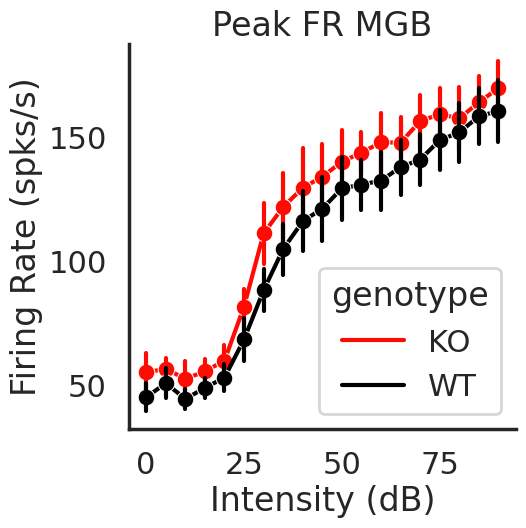

In [84]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = mgb_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='abs_peak_fr',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#sns.catplot(data=test_g,x='intensity',y='latency',hue='genotype')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spks/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak FR MGB')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_fr_MGB.svg',dpi=600,bbox_inches='tight')


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

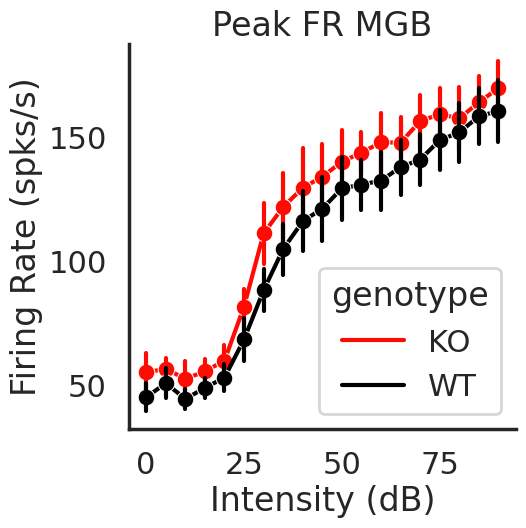

In [85]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = mgb_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='abs_peak_fr',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#sns.catplot(data=test_g,x='intensity',y='latency',hue='genotype')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spks/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak FR MGB')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_fr_MGB.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

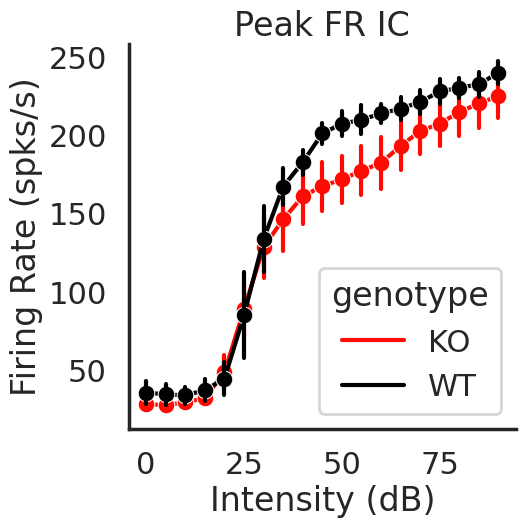

In [87]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ic_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='abs_peak_fr',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#sns.catplot(data=test_g,x='intensity',y='latency',hue='genotype')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spks/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak FR IC')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_fr_IC.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

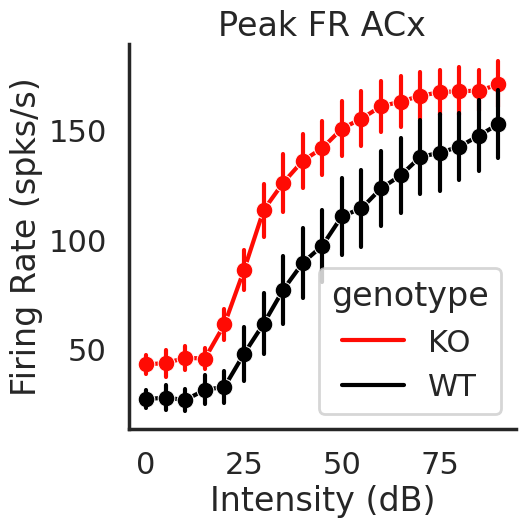

In [88]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ac_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='abs_peak_fr',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#sns.catplot(data=test_g,x='intensity',y='latency',hue='genotype')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spks/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak FR ACx')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_fr_ACx.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

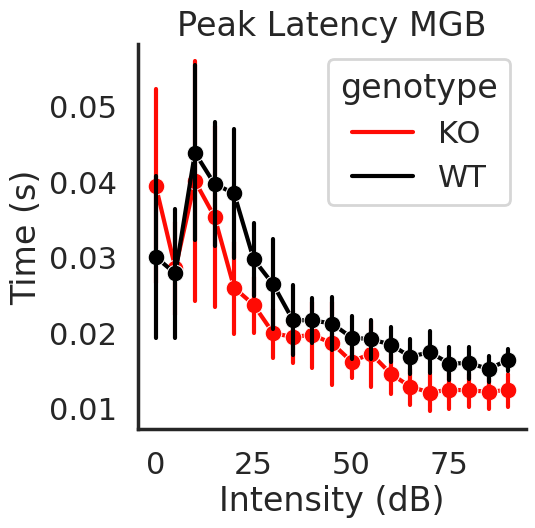

In [68]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = mgb_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='latency',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#sns.catplot(data=test_g,x='intensity',y='latency',hue='genotype')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak Latency MGB')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_altency_MGB.svg',dpi=600,bbox_inches='tight')


/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

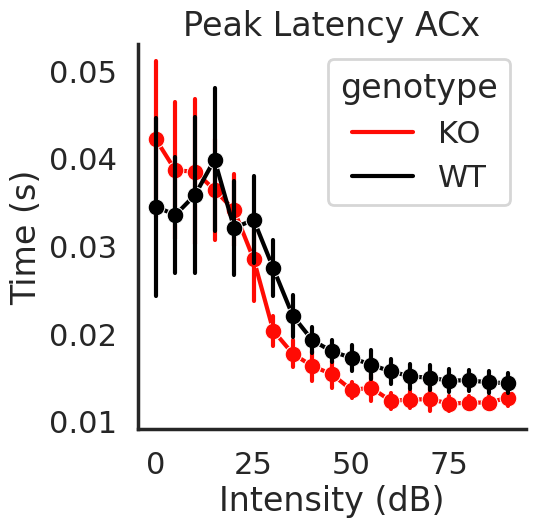

In [69]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ac_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='latency',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak Latency ACx')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_latency_ACx.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

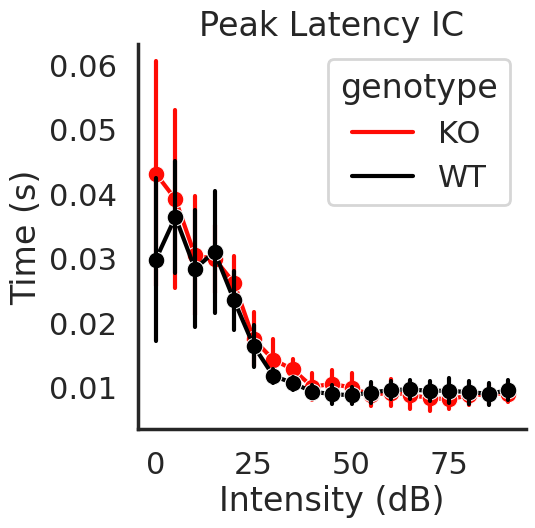

In [70]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ic_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='latency',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])

'''lines = ax1.get_lines()
marker_size = 9  # Adjust this value as needed
plt.setp(lines, markersize=marker_size)'''
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Peak Latency IC')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('peak_latency_IC.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

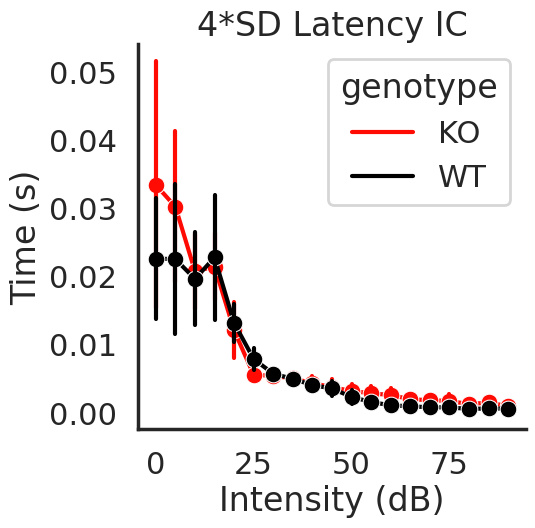

In [71]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ic_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='first_bin',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('4*SD Latency IC')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('sd4_latency_IC.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

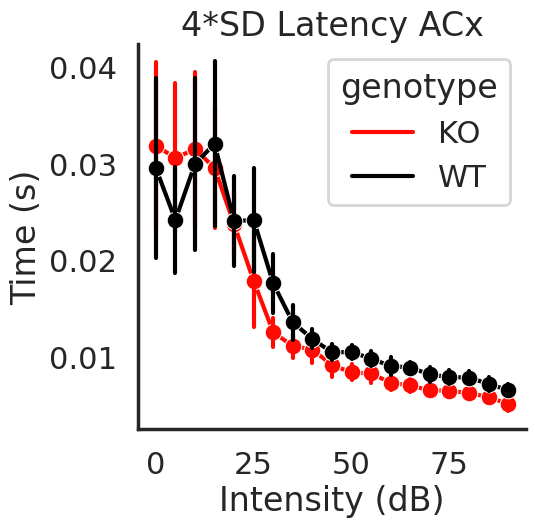

In [72]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ac_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='first_bin',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('4*SD Latency ACx')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('sd4_latency_ACx.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

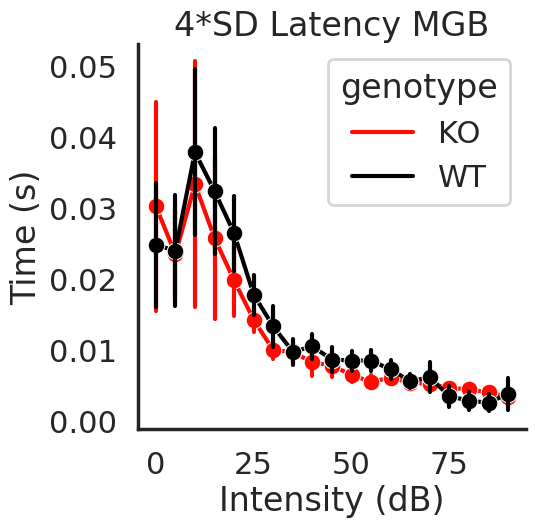

In [73]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = mgb_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='first_bin',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('4*SD Latency MGB')
sns.despine()
#plt.legend([],[], frameon=False)
#plt.xlim([20,90])
#plt.ylim([0,0.03])
#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('sd4_latency_MGB.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

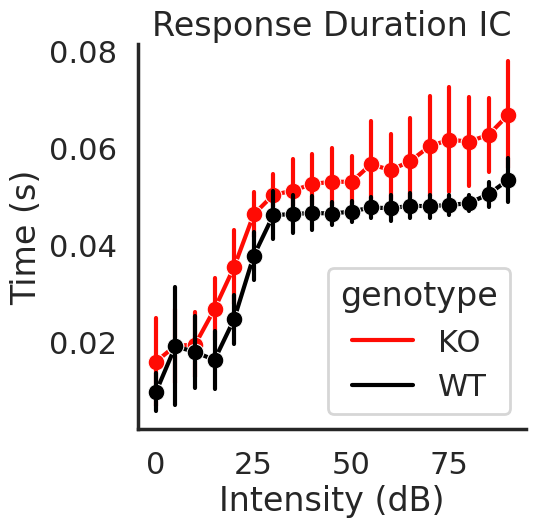

In [74]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ic_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='resp_duration',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Response Duration IC')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('duration_rlf_IC.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

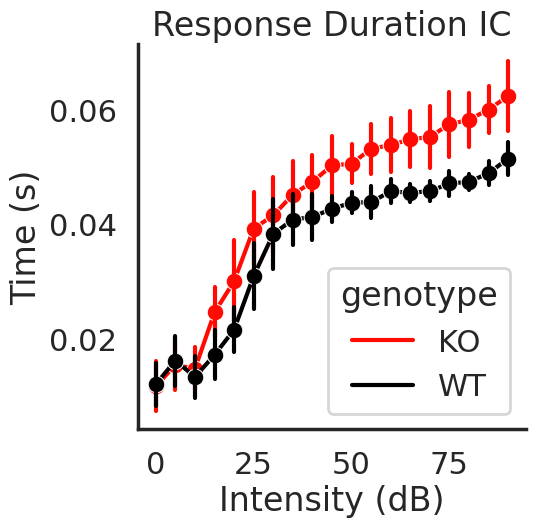

In [9]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ic_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='resp_duration',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Response Duration IC')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('duration_rlf_IC_redo.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

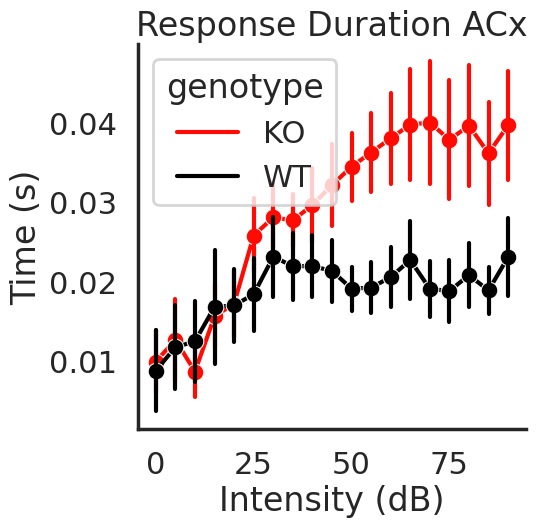

In [75]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ac_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='resp_duration',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Response Duration ACx')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('duration_rlf_ACx.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

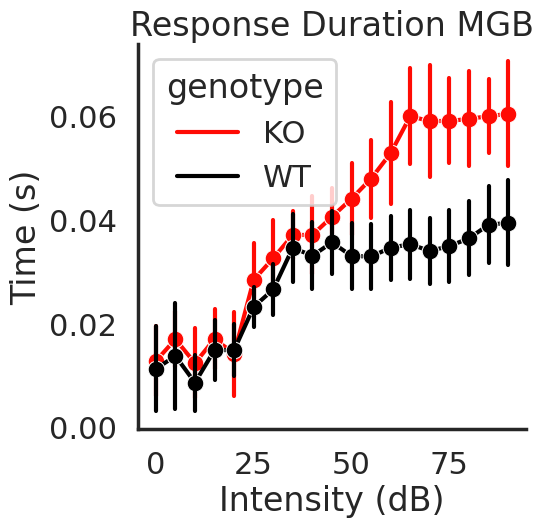

In [76]:
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = mgb_db.groupby(['file','intensity','genotype']).mean()
sns.lineplot(data=test_g,x='intensity',y='resp_duration',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('Response Duration MGB')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('duration_rlf_MGB.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

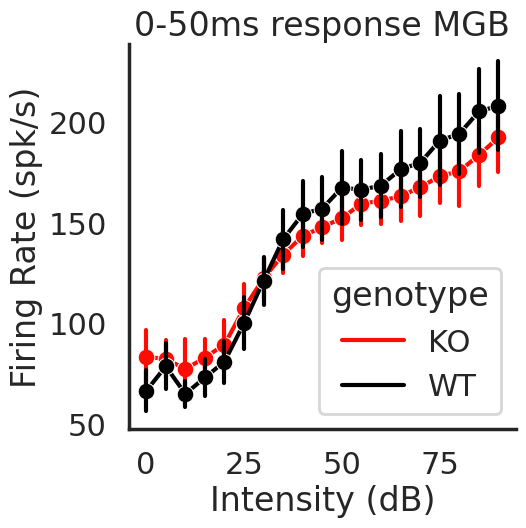

In [83]:
# look at firing from 0 to 50 ms
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = mgb_db.groupby(['file','intensity','genotype']).mean()
test_g['spks_10_40ms'] = test_g['spks_10_40ms'] / 5
sns.lineplot(data=test_g,x='intensity',y='spks_10_40ms',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spk/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('0-50ms response MGB')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('full_stim_firing_MGB.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

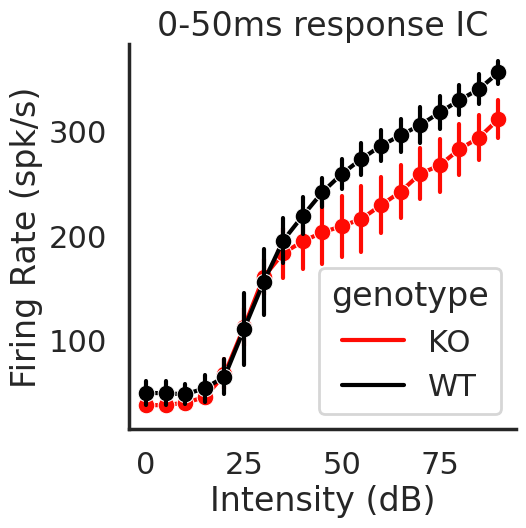

In [82]:
# look at firing from 0 to 50 ms
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ic_db.groupby(['file','intensity','genotype']).mean()
test_g['spks_10_40ms'] = test_g['spks_10_40ms'] / 5
sns.lineplot(data=test_g,x='intensity',y='spks_10_40ms',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spk/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('0-50ms response IC')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('full_stim_firing_IC.svg',dpi=600,bbox_inches='tight')



/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/auerbach1/anaconda3/envs/spikeinterface_testing/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/auerbach1/anaconda3/envs/spik

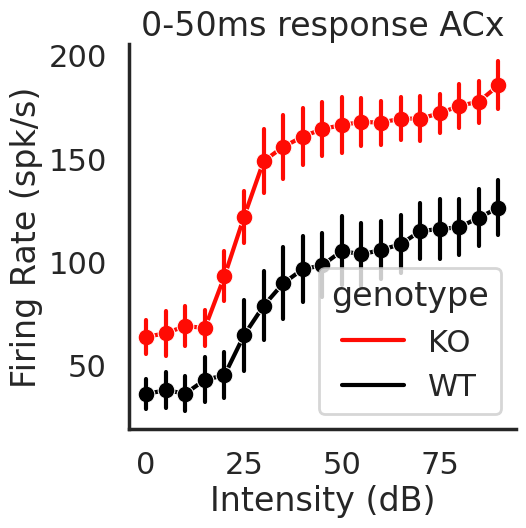

In [81]:
# look at firing from 0 to 50 ms
# plot each column as an average then as a function of intensity
sns.set_theme(context = 'poster',style='white')
colors = ["#FF0B04" ,"#000000"]
sns.set_palette(sns.color_palette(colors))
fig1,ax1 = plt.subplots(figsize=(5,5))
test_g = ac_db.groupby(['file','intensity','genotype']).mean()
test_g['spks_10_40ms'] = test_g['spks_10_40ms'] / 5
sns.lineplot(data=test_g,x='intensity',y='spks_10_40ms',hue='genotype',marker='o',errorbar=('se',2),ax=ax1,err_style='bars')
#ax1.set_xticklabels(['0','1/3','2/3','1'])
ax1.set_ylabel('Firing Rate (spk/s)')
ax1.set_xlabel('Intensity (dB)')
ax1.set_title('0-50ms response ACx')
sns.despine()
#plt.legend([],[], frameon=False)

#plt.savefig('C:/Users/admin/Box/Behavior Lab/Shared/Walker/fmr1_SD_analysis/final_figure_processing/ic_distance_cf_norm.svg',bbox_inches='tight')
plt.savefig('full_stim_firing_ACx.svg',dpi=600,bbox_inches='tight')



In [5]:
# grand PSTH?

mgb_db['PSTH'][19]

0    41.2
dtype: float64

In [6]:
mgb_db

,latency,abs_peak_fr,rel_peak_fr,resp_duration,first_bin,last_bin,smoothed_data,spks_10_40ms,file,channel,genotype,PSTH,intensity
19,-0.044971,62.0,45.000363,0.005,-10.000000,0.020000,45.000363,382.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,17,WT,0 41.2 dtype: float64,0
20,0.040193,77.0,60.339260,0.000,0.040193,0.040193,60.339260,533.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,17,WT,0 52.466667 dtype: float64,5
21,0.010152,67.0,50.877016,0.005,0.010152,0.015152,50.877016,532.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,17,WT,0 48.766667 dtype: float64,10
22,0.025029,57.0,42.909464,0.000,0.025029,0.025029,42.909464,466.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,17,WT,0 43.666667 dtype: float64,15
23,0.030029,74.0,59.287949,0.030,0.015029,0.060029,59.287949,623.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,17,WT,0 52.0 dtype: float64,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,0.010111,165.0,150.355235,0.005,0.005111,0.015111,150.355235,595.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,32,KO,0 41.133333 dtype: float64,70
7425,0.010111,158.0,146.120980,0.085,0.005111,0.095111,146.120980,592.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,32,KO,0 40.966667 dtype: float64,75
7426,0.010193,154.0,140.054781,0.010,0.005193,0.020193,140.054781,649.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,32,KO,0 43.7 dtype: float64,80
7427,0.010070,154.0,142.138661,0.020,0.005070,0.030070,142.138661,693.0,/media/auerbach1/Auerbach_HD_WG/Fmr1 SD Tanks/...,32,KO,0 42.766667 dtype: float64,85
